In [64]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
f = open("monthly_json.json", "r") # öffnet die Datei
file_content = f.read(500) # liest die ersten 100 Zeichen der Datei
file_content

'[{"Date": "2016-12-06", "Mean": 0.7895, "Source": "GCAG"},{"Date": "2016-12-06", "Mean": 0.81, "Source": "GISTEMP"},{"Date": "2016-11-06", "Mean": 0.7504, "Source": "GCAG"},{"Date": "2016-11-06", "Mean": 0.93, "Source": "GISTEMP"},{"Date": "2016-10-06", "Mean": 0.7292, "Source": "GCAG"},{"Date": "2016-10-06", "Mean": 0.89, "Source": "GISTEMP"},{"Date": "2016-09-06", "Mean": 0.8767, "Source": "GCAG"},{"Date": "2016-09-06", "Mean": 0.87, "Source": "GISTEMP"},{"Date": "2016-08-06", "Mean": 0.8998, '

In [3]:
data = pd.read_json("monthly_json.json") 

In [4]:
data.head()

,Date,Mean,Source
0,2016-12-06,0.7895,GCAG
1,2016-12-06,0.8100,GISTEMP
2,2016-11-06,0.7504,GCAG
3,2016-11-06,0.9300,GISTEMP
4,2016-10-06,0.7292,GCAG


In [5]:
pivot_df = data.pivot(index='Date', columns='Source', values='Mean')
pivot_df.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


In [6]:
# Zeitwerte für x
GCAG_data = pivot_df["GCAG"]
x = GCAG_data.index.values.astype(np.int64) / 100000000
x = x.reshape(-1,1)
x

array([[-2.8397088e+10],
       [-2.8370304e+10],
       [-2.8345248e+10],
       ...,
       [ 1.4757120e+10],
       [ 1.4783904e+10],
       [ 1.4809824e+10]])

In [7]:
# Temperaturwerte für y
y = pivot_df["GCAG"].values
y


array([ 0.0009, -0.1229, -0.1357, ...,  0.7292,  0.7504,  0.7895])

In [8]:
# Anwendung von KNR für Temperaturdaten
knr = KNeighborsRegressor (n_neighbors= 2, weights = "uniform", algorithm = "brute").fit(x,y)

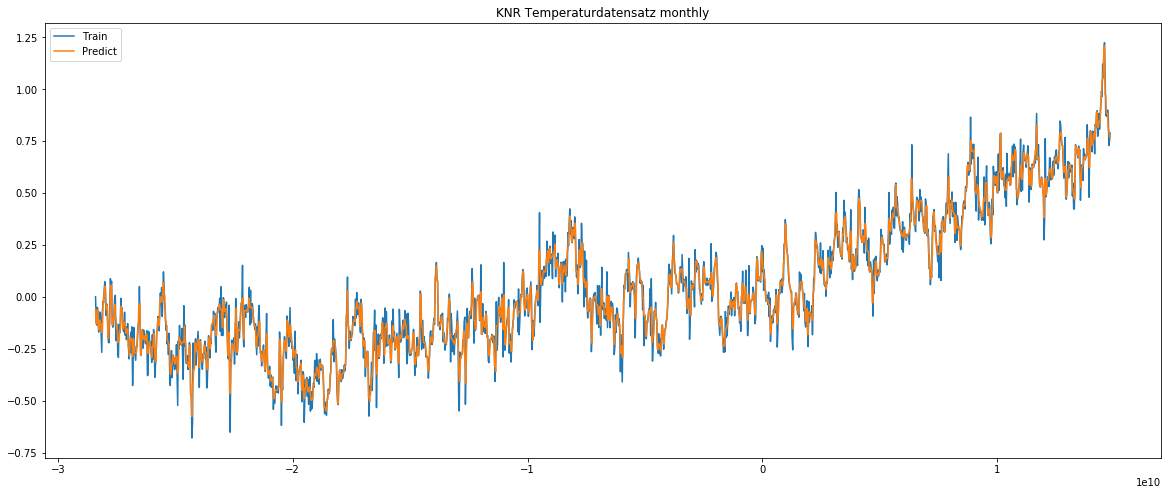

In [9]:
# Predicten der Temperatur basierend auf den Zeitwerten
data_df = pd.DataFrame(GCAG_data)
data_df["KNR"] = knr.predict(x)
data_df

plt.figure(figsize =(20,8))
plt.plot(x, pivot_df["GCAG"], label = "Train")
plt.plot(x, data_df["KNR"], label = "Predict")
plt.legend(loc="upper left")
plt.title("KNR Temperaturdatensatz monthly")
plt.show()



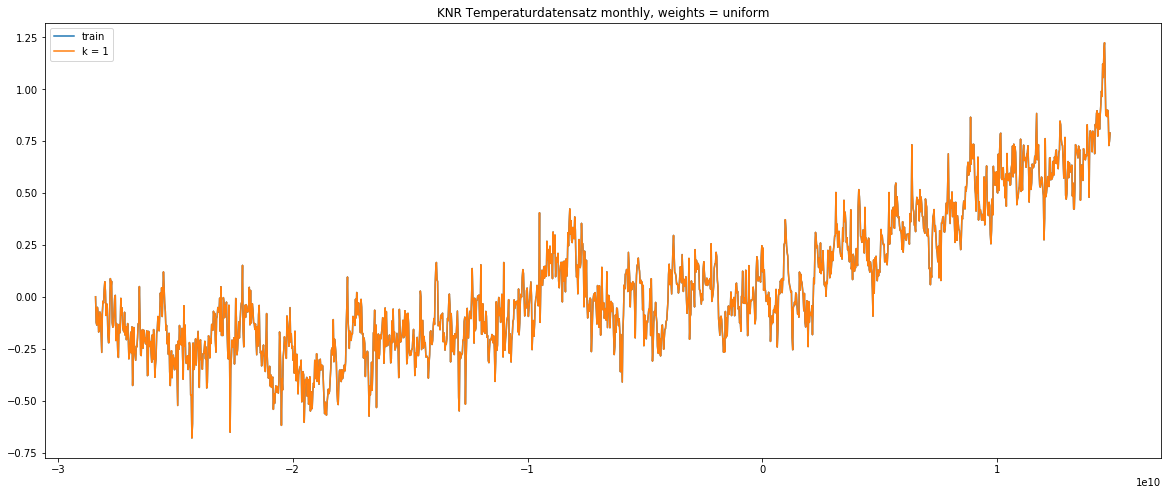

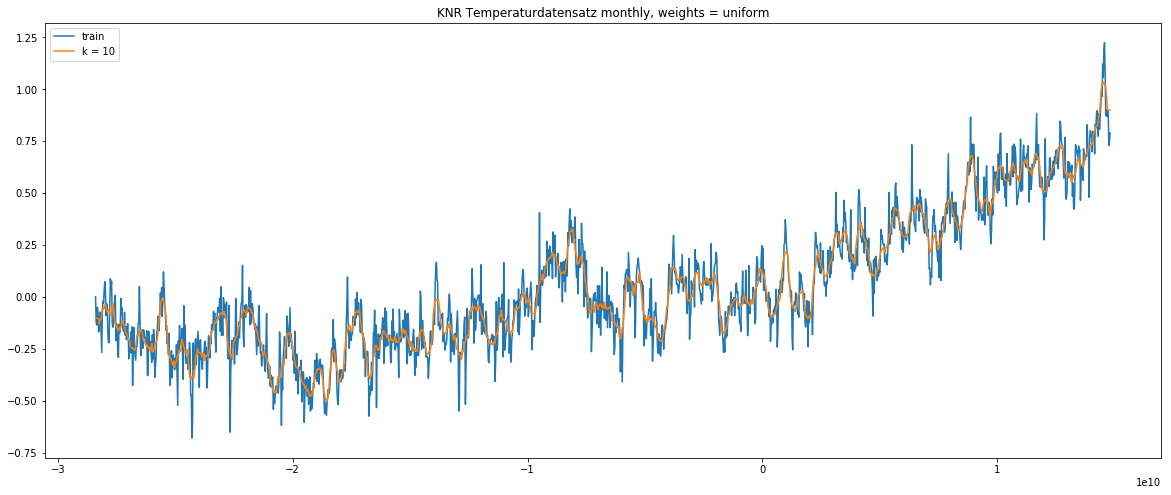

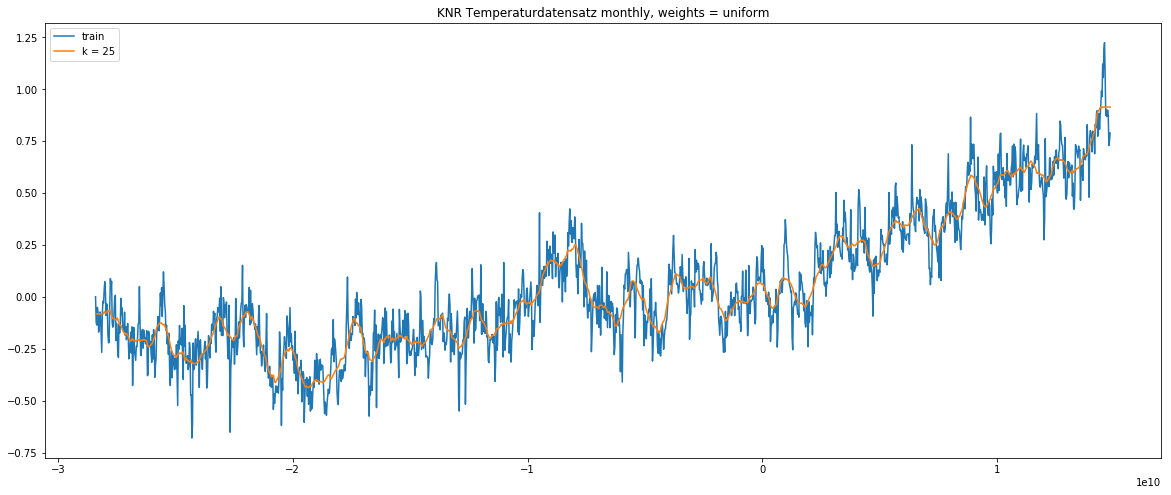

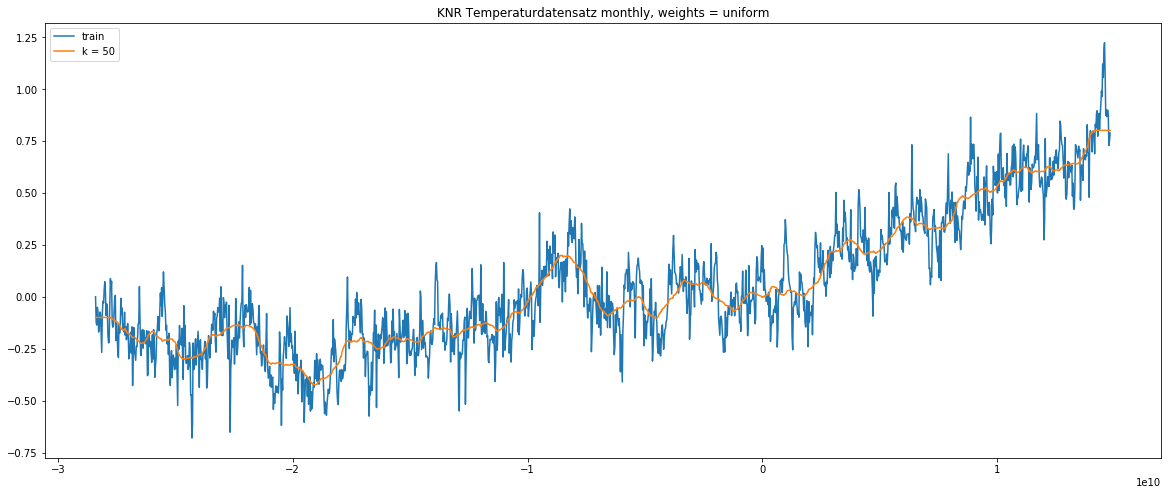

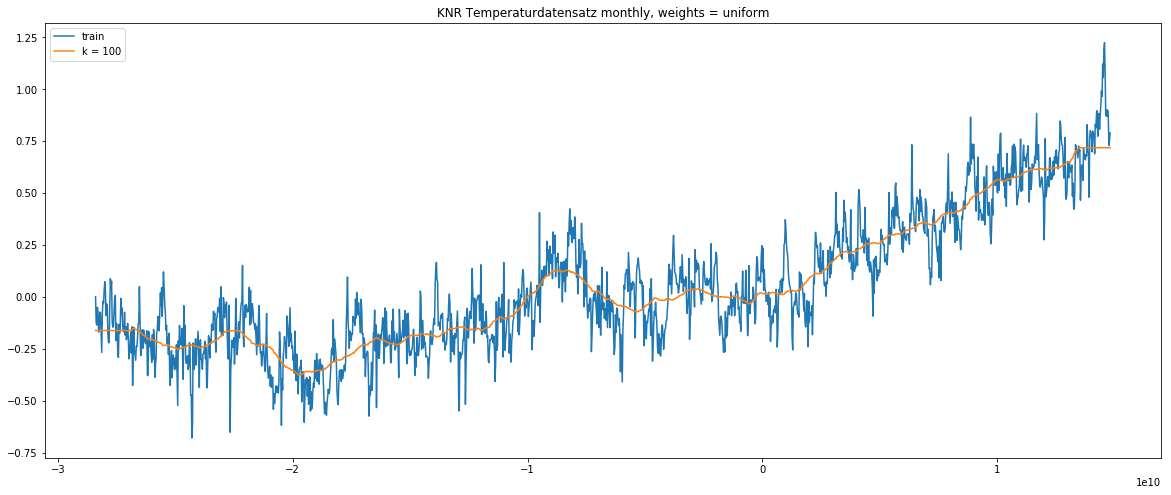

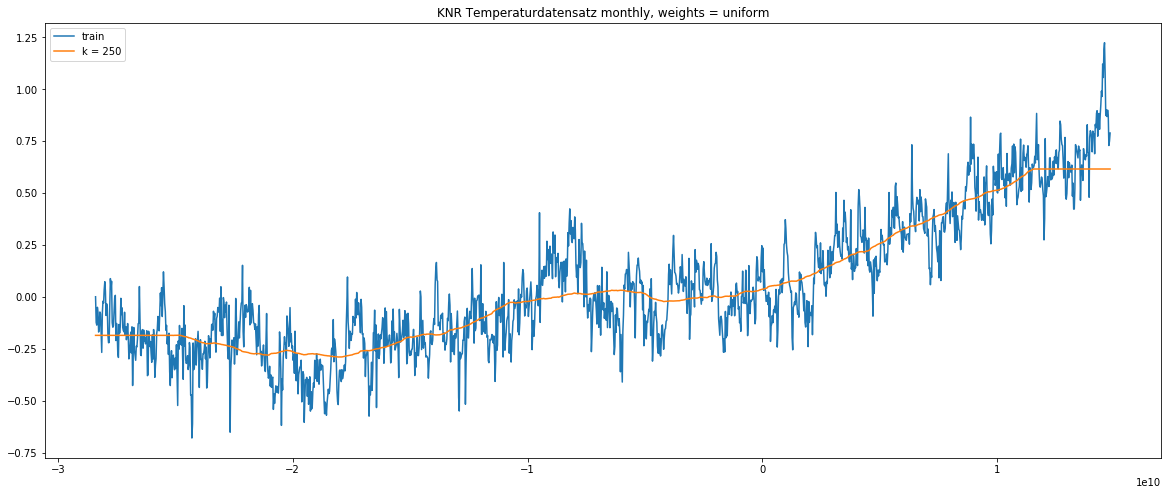

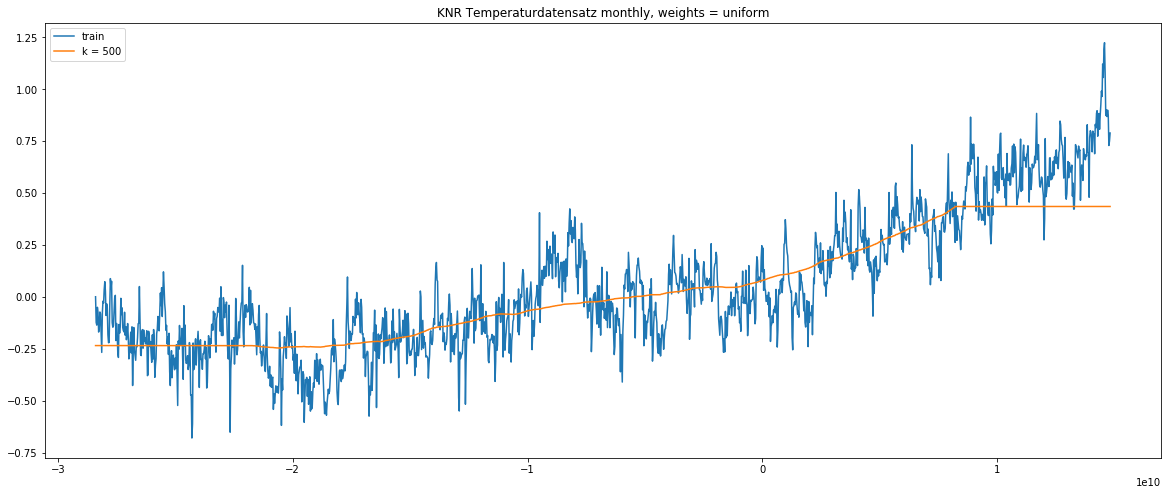

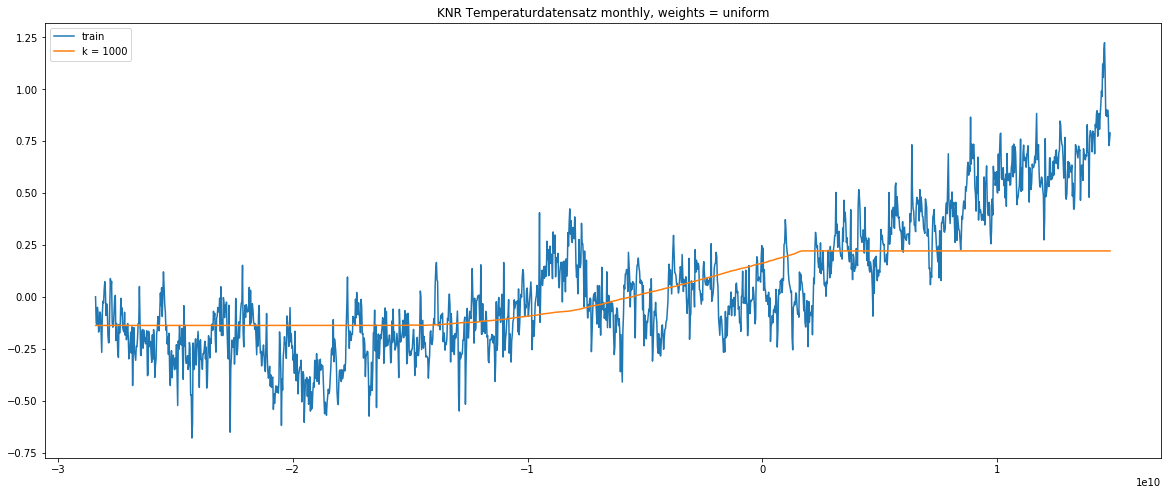

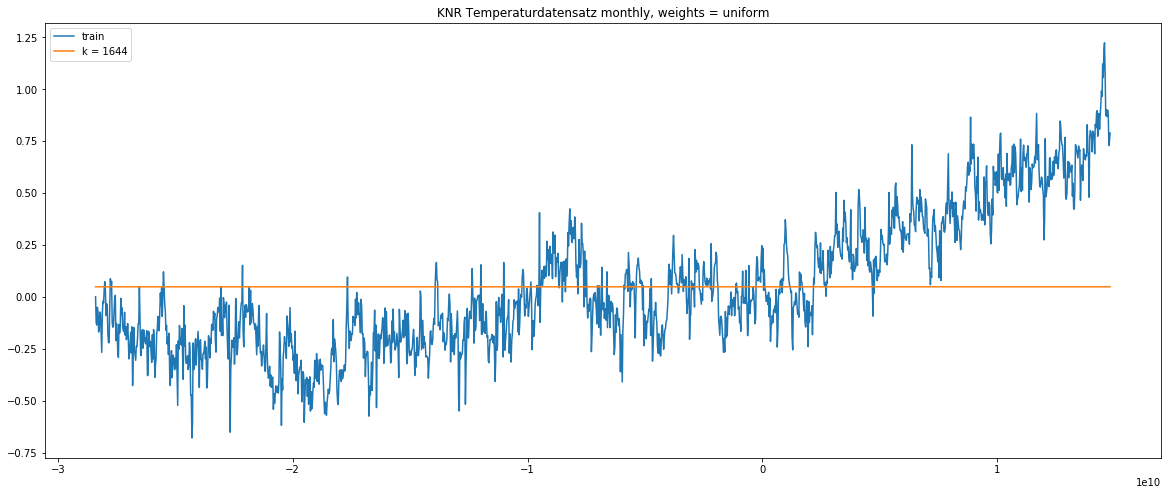

In [10]:
# for loop, um verschieden k darzustellen
output_data = pd.DataFrame(pivot_df["GCAG"].copy(deep = True))
k_range  = [1,10,25,50,100, 250, 500, 1000, 1644]

for k in k_range:
    knr = KNeighborsRegressor (n_neighbors= k, weights = "uniform", algorithm = "brute").fit(x,y)
 
    #Anfügen der berechneten Daten für Trainigsdaten und Testdaten
    output_data["k " + str(k)] = knr.predict(x)  
    plt.figure(figsize =(20,8))
    plt.plot(x, pivot_df["GCAG"], label = "train")
    plt.plot(x, output_data["k " + str(k)], label = "k = " + str(k))
    plt.legend(loc="upper left")
    plt.title("KNR Temperaturdatensatz monthly, weights = uniform")
    plt.show()



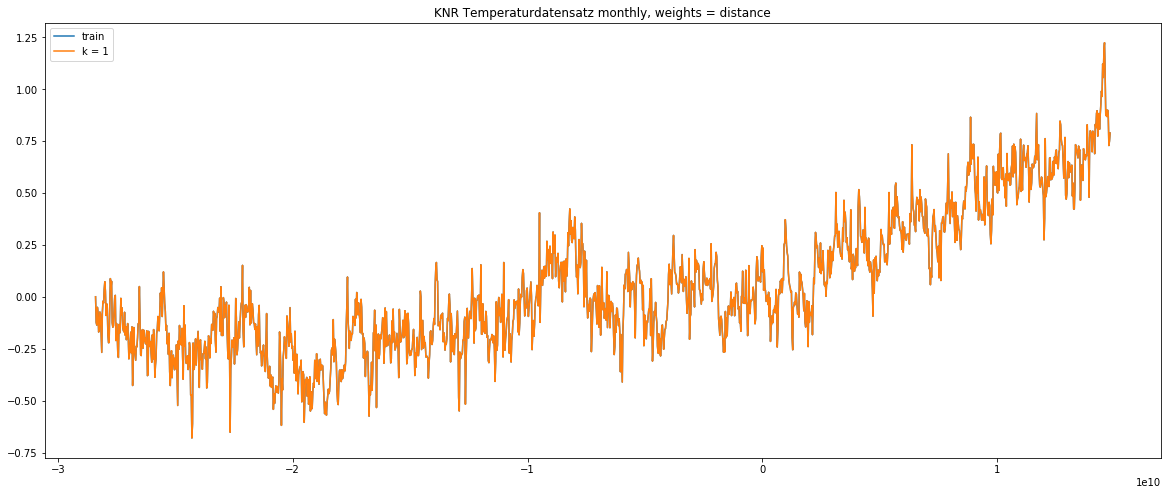

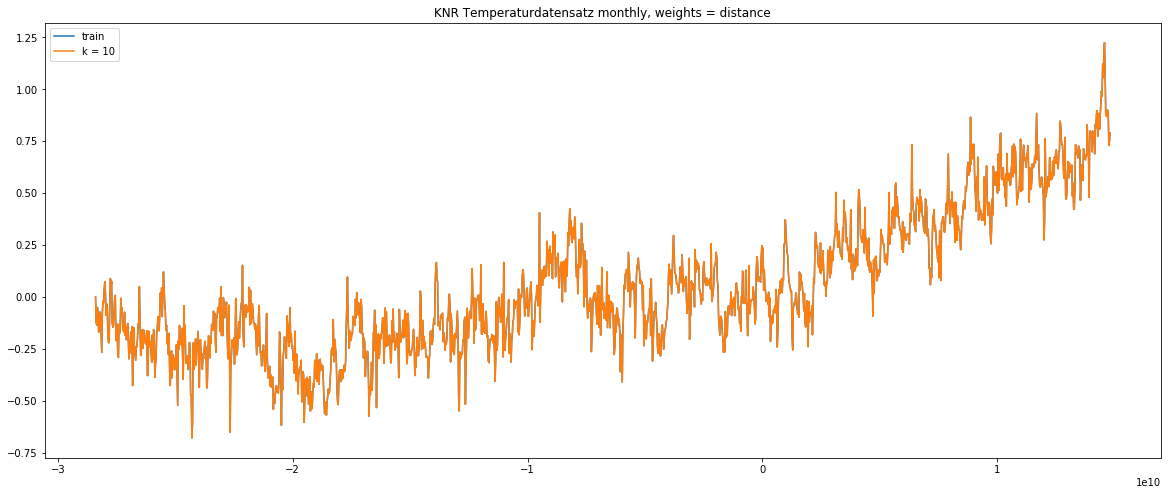

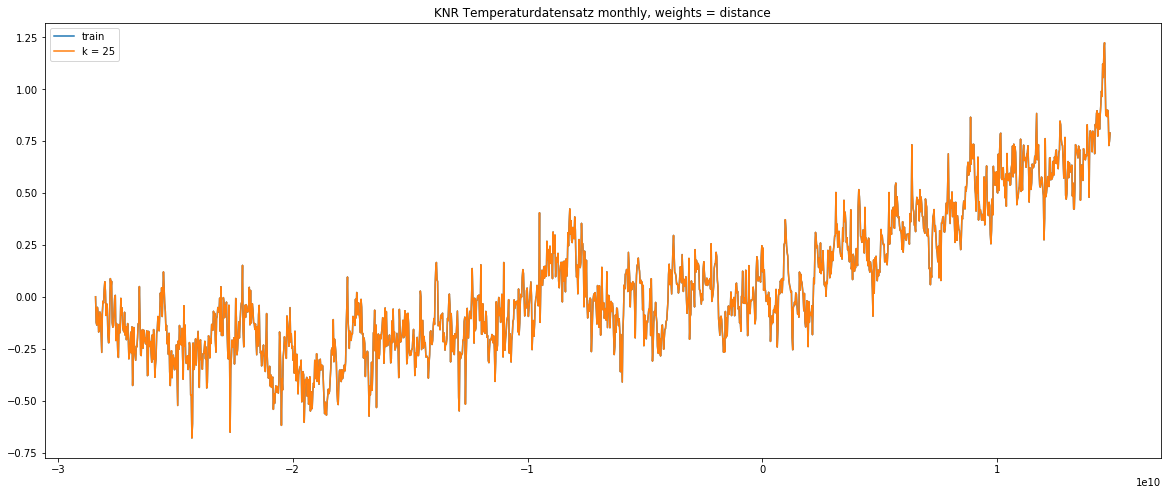

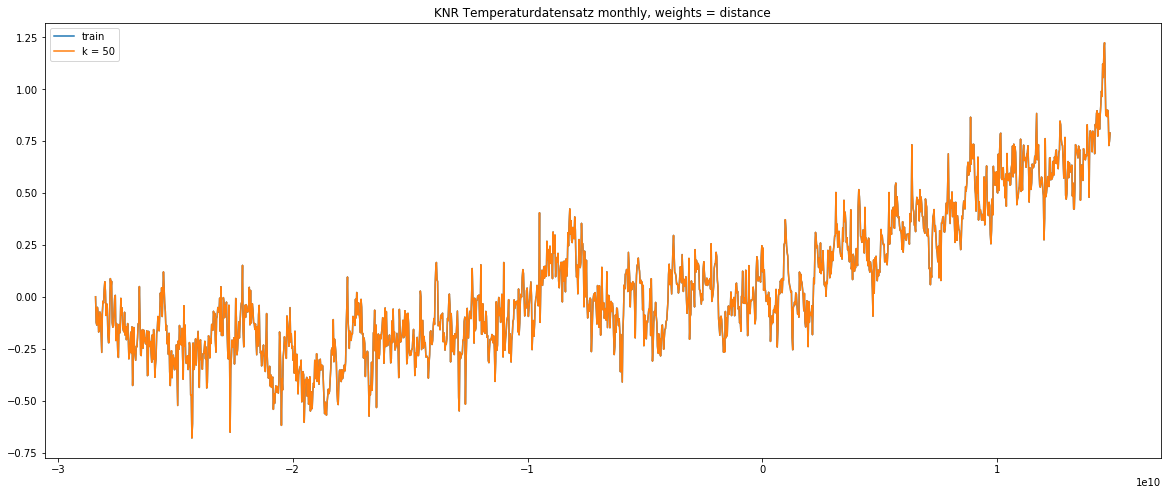

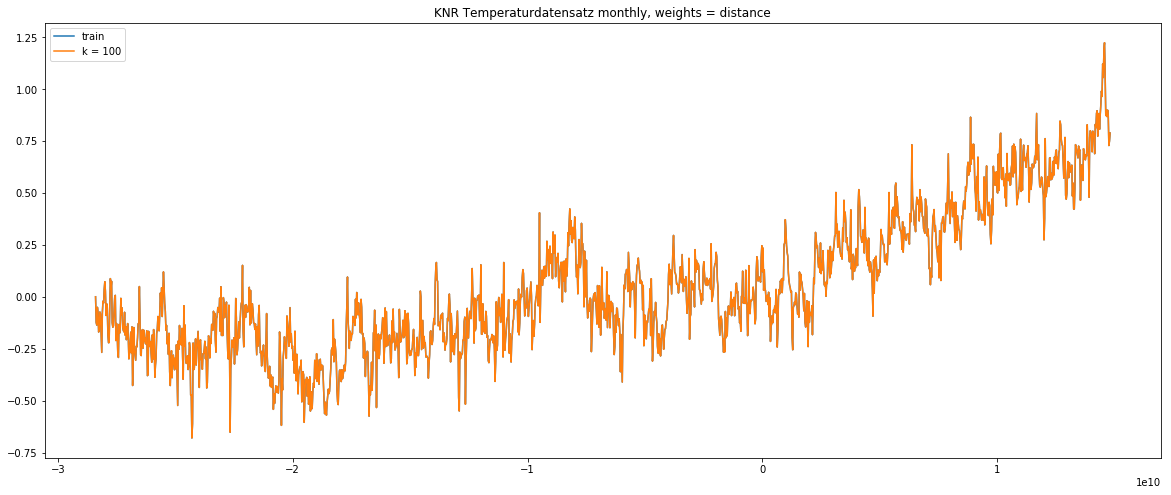

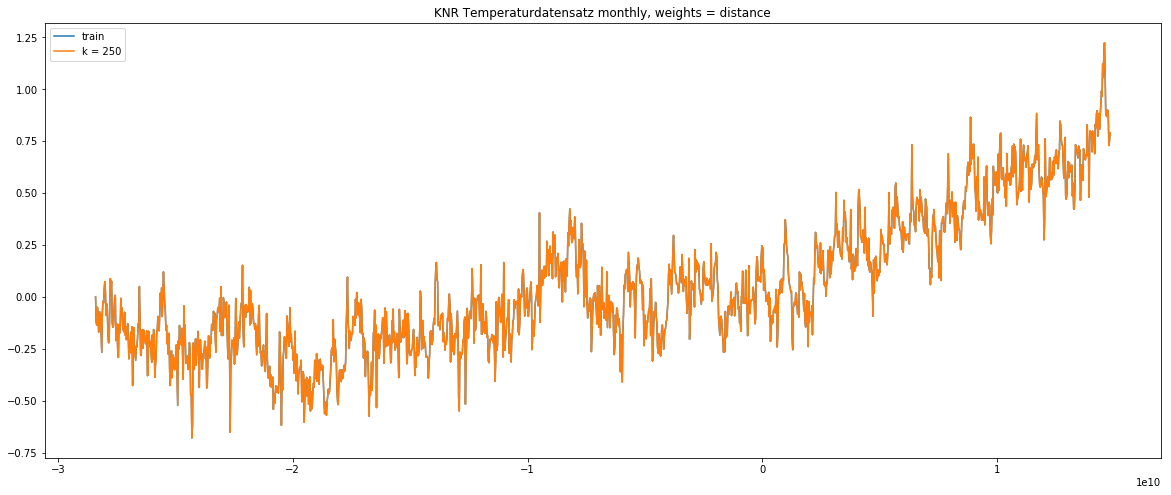

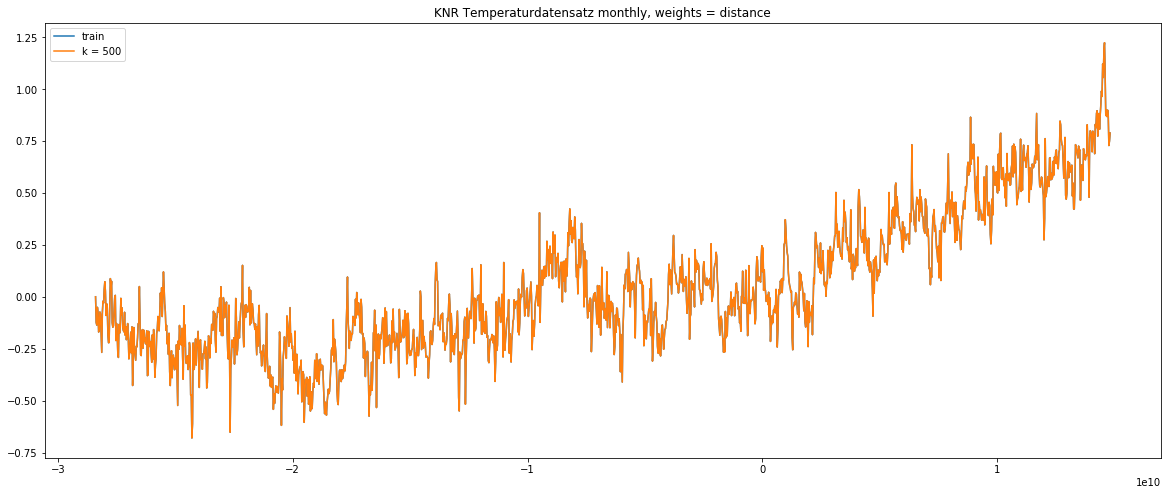

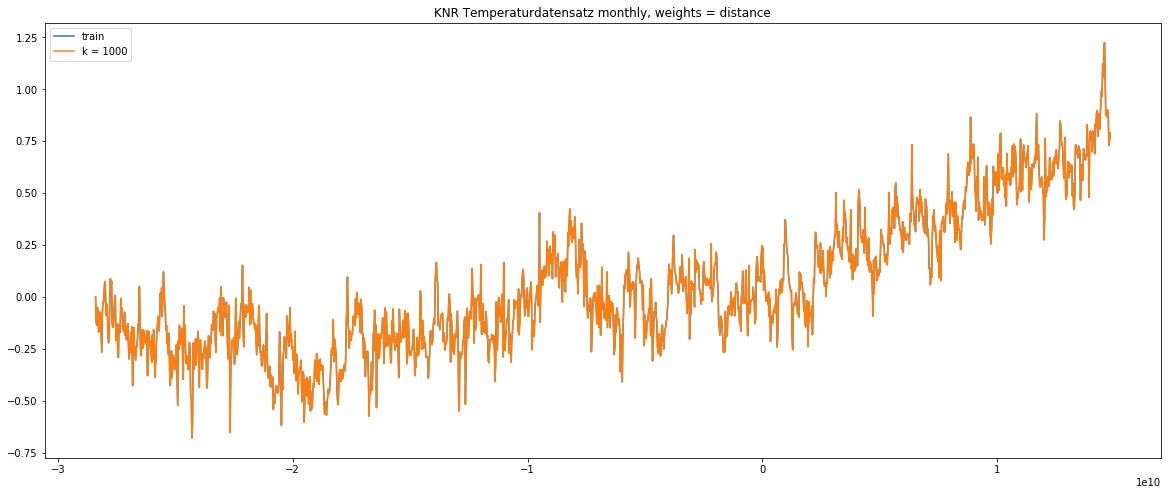

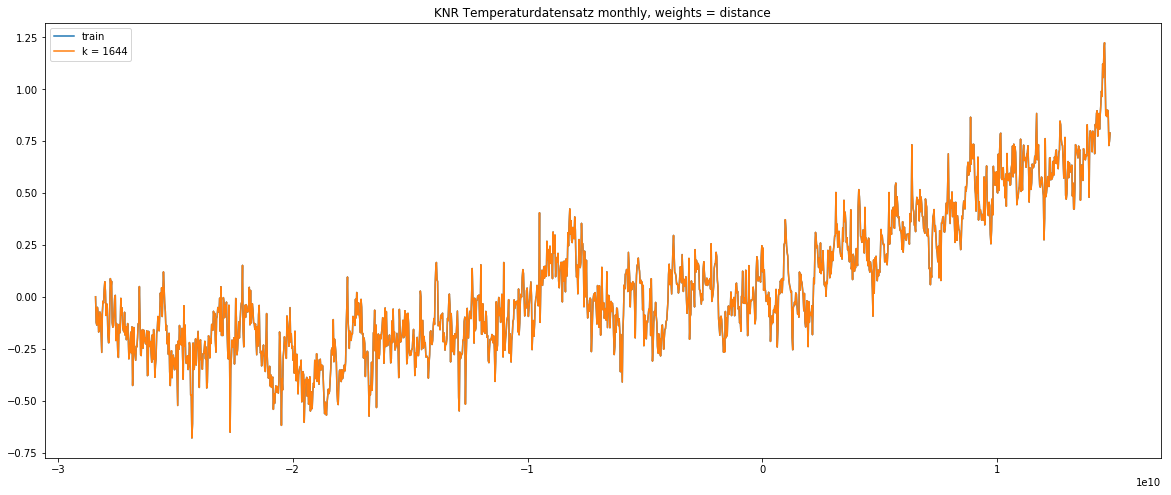

In [11]:
# Hyperparameter weights = "distance"
output_data = pd.DataFrame(pivot_df["GCAG"].copy(deep = True))
k_range  = [1,10,25,50,100, 250, 500, 1000, 1644]

for k in k_range:
    knr = KNeighborsRegressor (n_neighbors= k, weights = "distance", algorithm = "brute").fit(x,y)
 
    #Anfügen der berechneten Daten für Trainigsdaten und Testdaten
    output_data["k " + str(k)] = knr.predict(x)  
    plt.figure(figsize =(20,8))
    plt.plot(x, pivot_df["GCAG"], label = "train")
    plt.plot(x, output_data["k " + str(k)], label = "k = " + str(k))
    plt.legend(loc="upper left")
    plt.title("KNR Temperaturdatensatz monthly, weights = distance")
    plt.show()

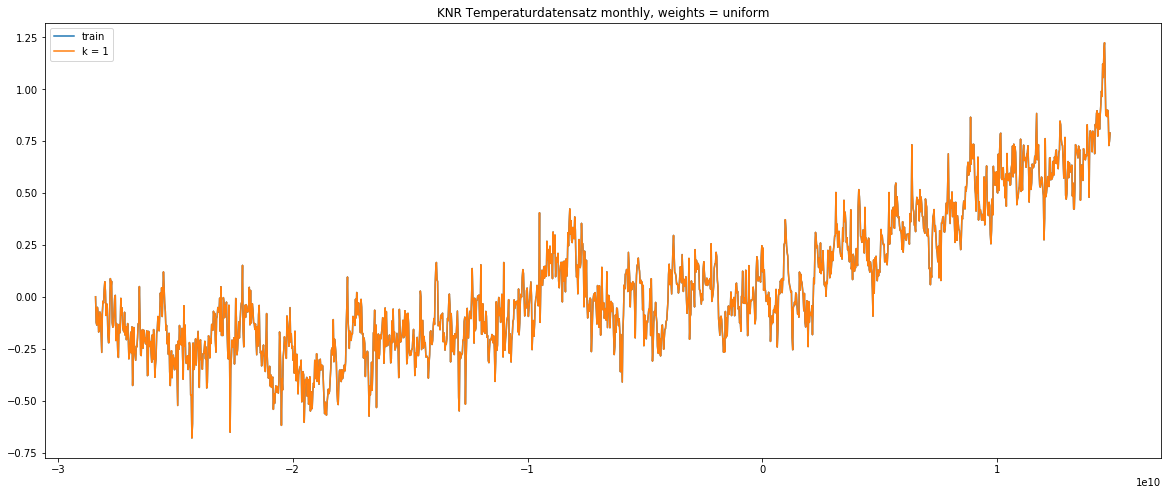

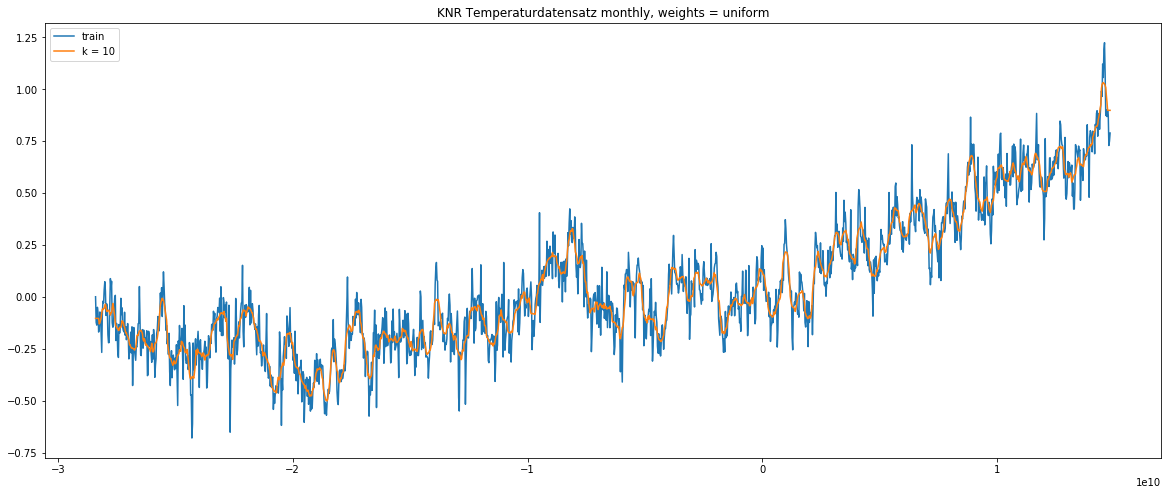

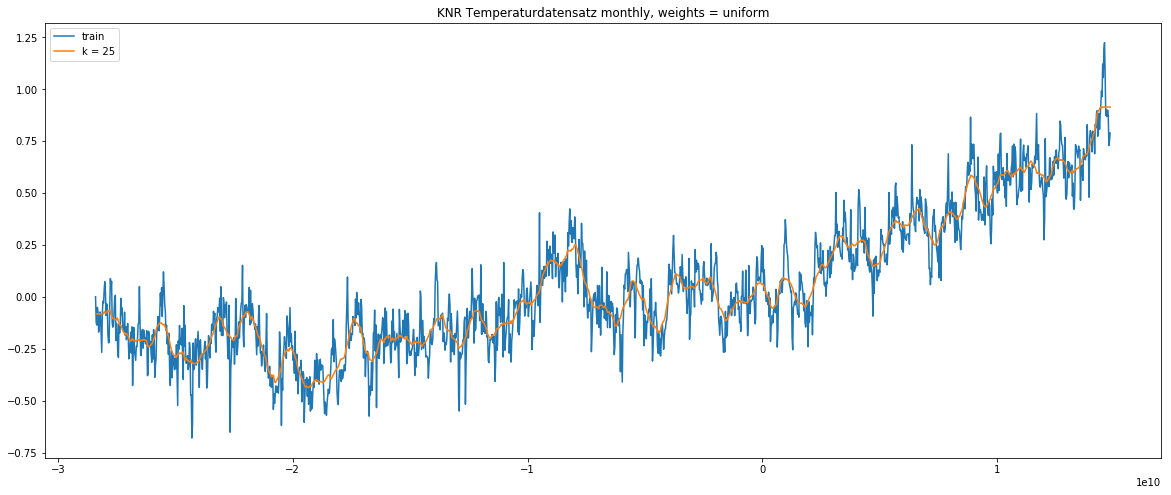

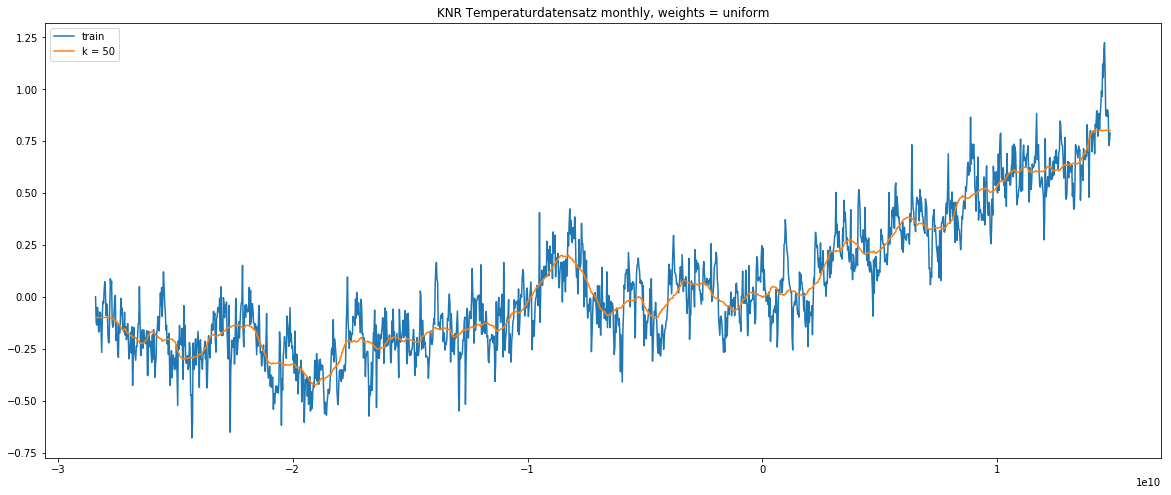

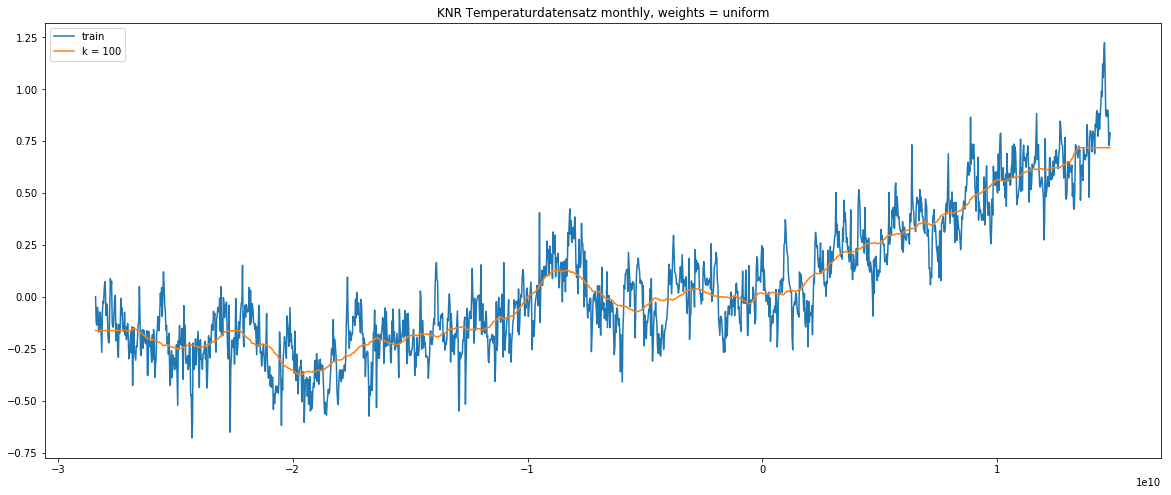

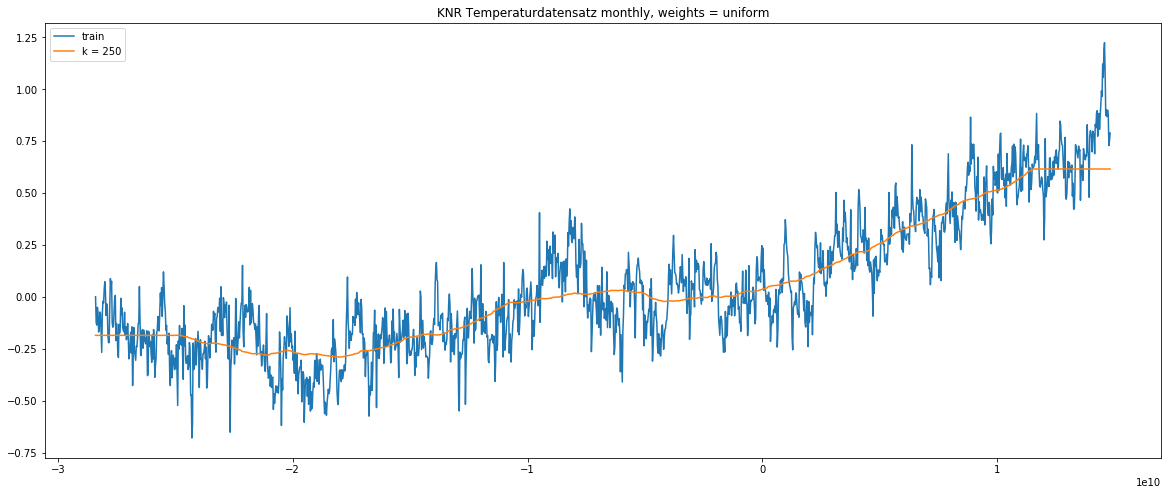

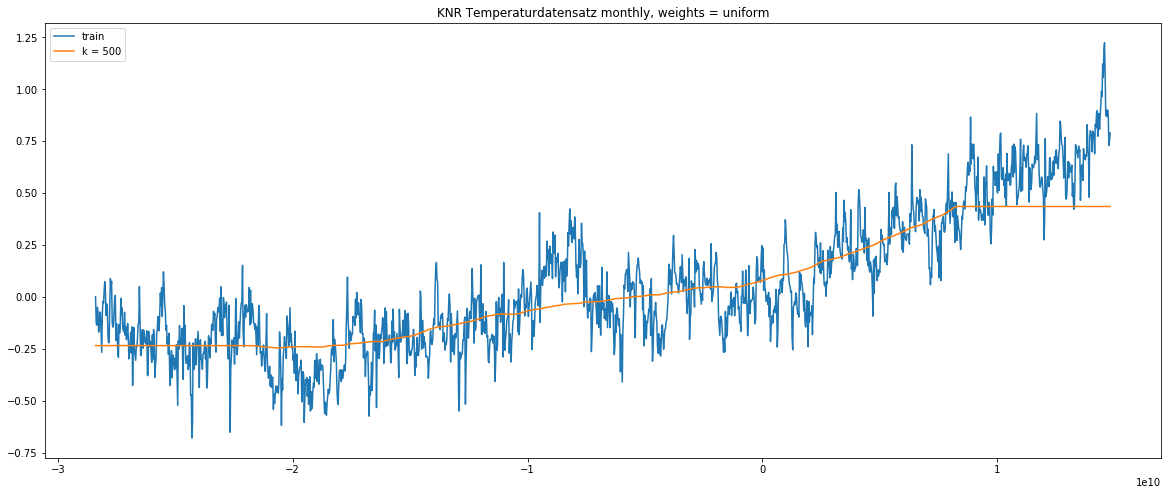

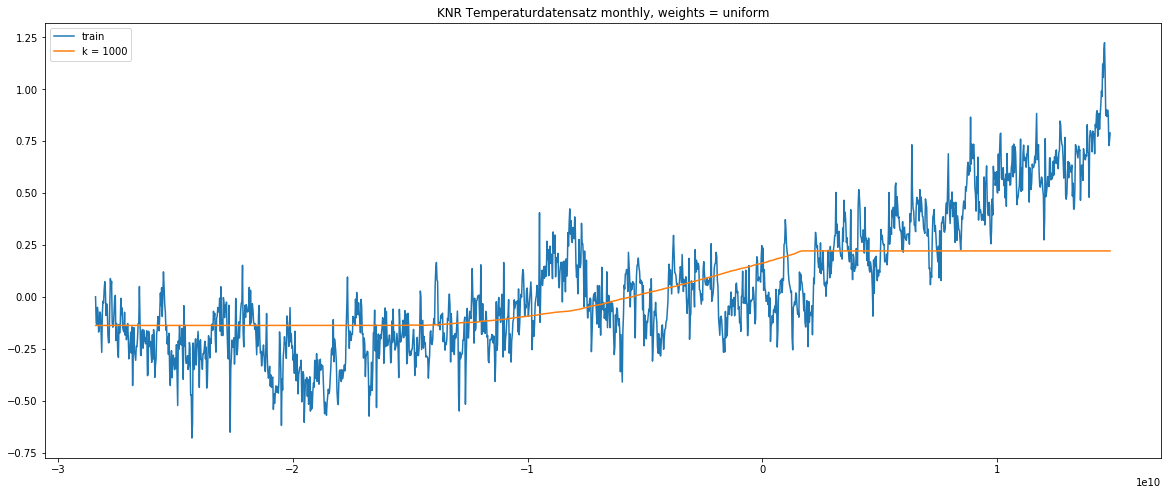

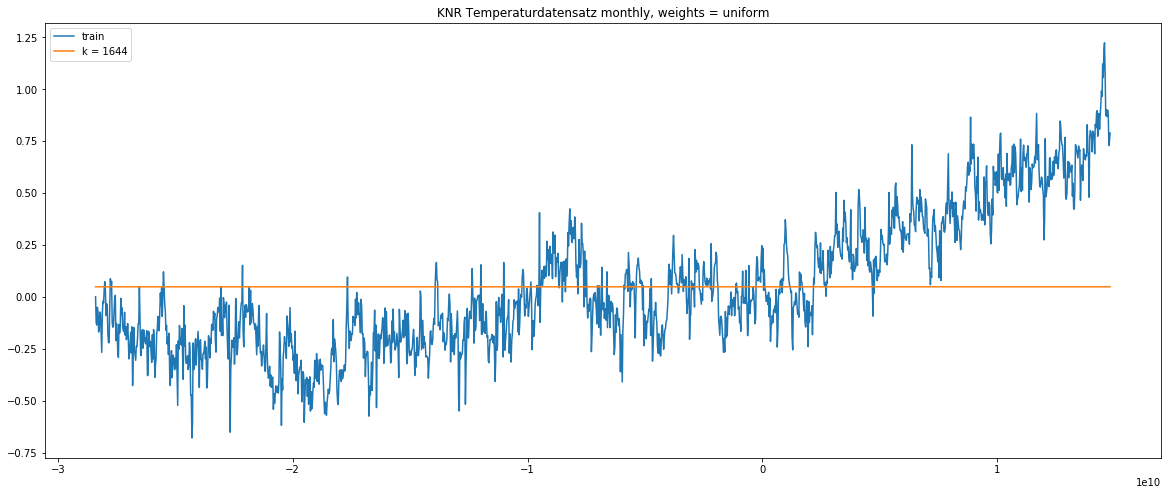

In [12]:
# Hyperparameter, algorithm = "auto"
output_data = pd.DataFrame(pivot_df["GCAG"].copy(deep = True))
k_range  = [1,10,25,50,100, 250, 500, 1000, 1644]

for k in k_range:
    knr = KNeighborsRegressor (n_neighbors= k, weights = "uniform", algorithm = "auto").fit(x,y)
 
    #Anfügen der berechneten Daten für Trainigsdaten und Testdaten
    output_data["k " + str(k)] = knr.predict(x)  
    plt.figure(figsize =(20,8))
    plt.plot(x, pivot_df["GCAG"], label = "train")
    plt.plot(x, output_data["k " + str(k)], label = "k = " + str(k))
    plt.legend(loc="upper left")
    plt.title("KNR Temperaturdatensatz monthly, weights = uniform")
    plt.show()

# Lineare Regression

In [15]:
linreg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1).fit(x,y)

In [47]:
data_df = pd.DataFrame(GCAG_data)
data_df["LinReg"] = linreg.predict(x)
y_linreg = linreg.predict(x)
data_df.count()

GCAG      1644
LinReg    1644
dtype: int64

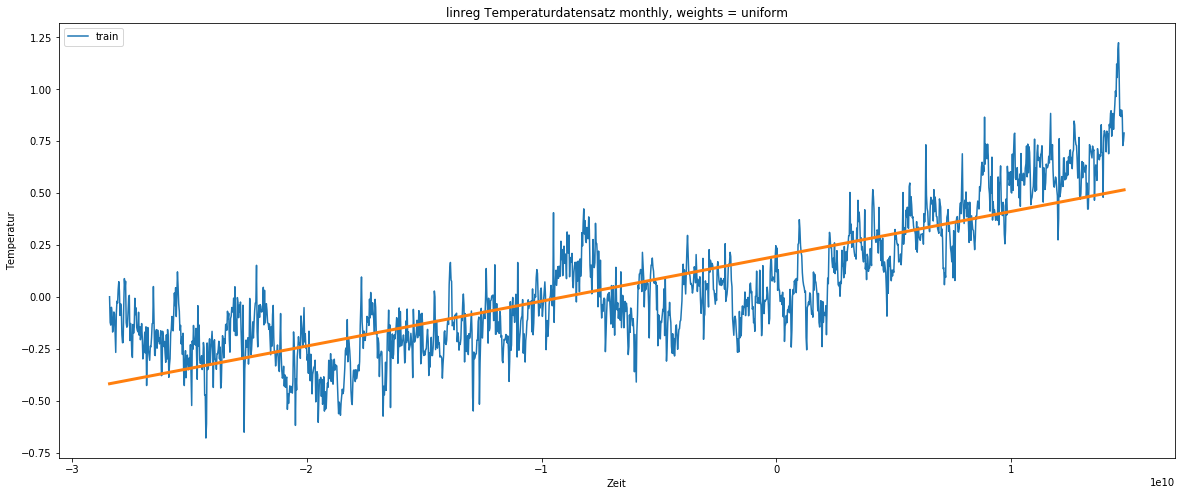

55.24392937603957

In [39]:
output_data_linreg = pd.DataFrame(pivot_df["GCAG"].copy(deep = True))

plt.figure(figsize =(20,8))
plt.plot(x, pivot_df["GCAG"], label = "train")
plt.plot(x, y_linreg, linewidth = 3)
plt.xlabel ("Zeit")
plt.ylabel("Temperatur")
plt.legend(loc="upper left")
plt.title("linreg Temperaturdatensatz monthly, weights = uniform")
plt.show()



In [54]:
rss = (y_linreg - pivot_df["GCAG"])**2
rss.mean()

0.03360336336742068

In [56]:
#Bestimmung des RSS (residual sum of squares)
rss_linreg = mean_squared_error(pivot_df["GCAG"], y_linreg, sample_weight=None, multioutput="uniform_average")
rss_linreg

0.03360336336742066

In [59]:
# Bestimmung des R**2/Bestimmtheitsmaß/Korrelationskoeffizient
r2_score(pivot_df["GCAG"], y_linreg)

0.684063463173839

In [63]:
# Berechnung des RSE (residual standard error)
RSE = abs(y_linreg - pivot_df["GCAG"])
# abs() Betrag
RSE.head()

Date
1880-01-06    0.419001
1880-02-06    0.294622
1880-03-06    0.281281
1880-04-06    0.366502
1880-05-06    0.342041
Name: GCAG, dtype: float64

# Aufgabe: 
- Implementiere Lineare Regression
- Teile die Daten in ein Train- und Test-set
- Berechne Trainings- und Test- Fehler für KNR und Lineare Regression:
    - RSE (residual standard error)
    - RSS (residual sum of squares)
    - R^2 Statistik (Bestimmtheitsmaß, Korrelationskoeffizeint)

In [65]:
# Daten in Test- und Trainingsdaten aufteilen. Mit 80 % der Daten wird trainiert, mit 20 % der Daten wird getestet

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [108]:
x_train_sort = np.sort(x_train, axis = 0)
type(x_train_sort)

numpy.ndarray

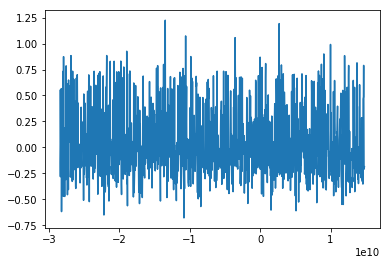

In [78]:
plt.plot(x_train_sort, y_train)
plt.show()

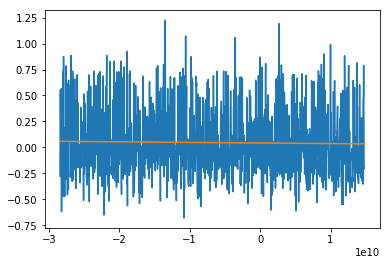

In [82]:
linreg_train = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1).fit(x_train_sort,y_train)
predict_train = linreg_train.predict(x_train_sort)


plt.plot(x_train_sort,y_train)
plt.plot(x_train_sort,predict_train)
plt.show()

In [84]:
# Berechnung von:
    # - residual standard error (RSE)
    # - residual sum of squares (RSS)
    # - R**2 (Bestimmtheitsmaß, Korrelationskoeffizient)
# RSE    
RSE_train = abs(predict_train - x_train_sort)
RSE_train

array([[2.8397088e+10, 2.8397088e+10, 2.8397088e+10, ..., 2.8397088e+10,
        2.8397088e+10, 2.8397088e+10],
       [2.8370304e+10, 2.8370304e+10, 2.8370304e+10, ..., 2.8370304e+10,
        2.8370304e+10, 2.8370304e+10],
       [2.8345248e+10, 2.8345248e+10, 2.8345248e+10, ..., 2.8345248e+10,
        2.8345248e+10, 2.8345248e+10],
       ...,
       [1.4704416e+10, 1.4704416e+10, 1.4704416e+10, ..., 1.4704416e+10,
        1.4704416e+10, 1.4704416e+10],
       [1.4757120e+10, 1.4757120e+10, 1.4757120e+10, ..., 1.4757120e+10,
        1.4757120e+10, 1.4757120e+10],
       [1.4809824e+10, 1.4809824e+10, 1.4809824e+10, ..., 1.4809824e+10,
        1.4809824e+10, 1.4809824e+10]])

In [98]:
# RSS
RSS_train = mean_squared_error(y_train, predict_train, sample_weight=None, multioutput="uniform_average")
RSS_train

0.10313438907618899

In [99]:
# Bestimmtheitsmaß/Korrelationskoeffizient
r2_train = r2_score(y_train, predict_train)
r2_train

0.00047620980904738985

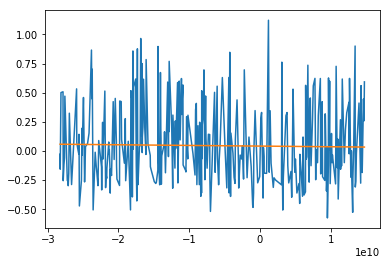

In [100]:
x_test_sort = np.sort(x_test, axis = 0)
predict_test = linreg_train.predict(x_test_sort)

plt.plot(x_test_sort,y_test)
plt.plot(x_test_sort,predict_test)
plt.show()

In [106]:
RSE_test = abs(predict_test - y_test)


In [102]:
RSS_test = mean_squared_error(y_test, predict_test, sample_weight=None, multioutput="uniform_average")
RSS_test

0.11895216586585283

In [103]:
r2_test = r2_score(y_test, predict_test)
r2_test

-0.0004114643267254525

# Aufteilung der Daten in Trainings- und Testdaten für KNR und Berechnung der Fehler

In [120]:
# Fitten der Testdaten
knr_train = KNeighborsRegressor (n_neighbors= 100, weights = "uniform", algorithm = "brute").fit(x_train_sort,y_train)

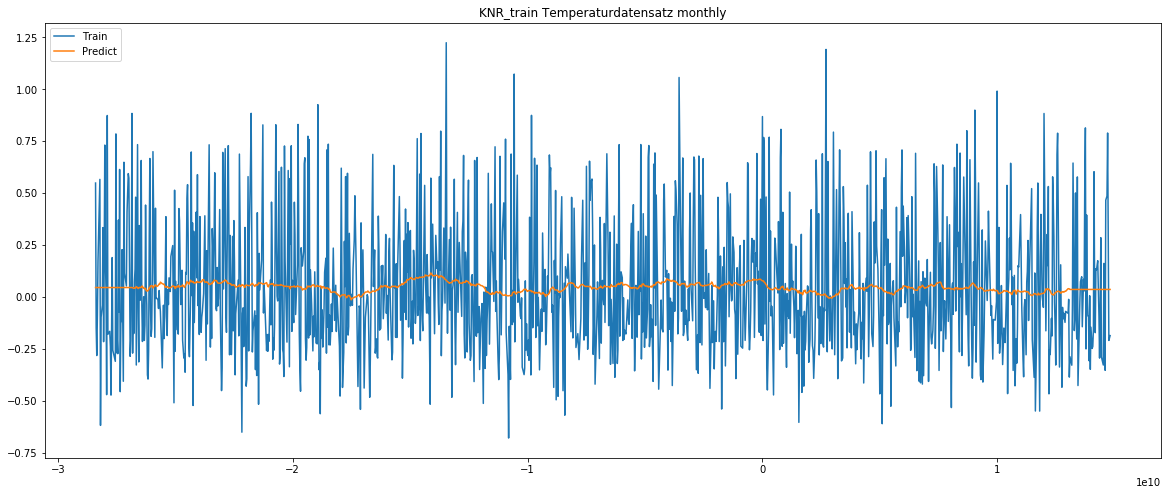

In [121]:
# Predicten der Temperatur basierend auf den Zeitwerten mit den Trainigsdaten
pd_train = pd.DataFrame(x_train_sort)
pd_train["KNR_train"] = knr_train.predict(x_train_sort)
pd_train

plt.figure(figsize =(20,8))
plt.plot(x_train_sort, y_train, label = "Train")
plt.plot(x_train_sort, pd_train["KNR_train"], label = "Predict")
plt.legend(loc="upper left")
plt.title("KNR_train Temperaturdatensatz monthly")
plt.show()

In [126]:
# Berechnung der Fehler für den Trainingsdatensatz
RSE_train_knr = abs(pd_train["KNR_train"] - y_train)
RSE_train_knr
RSS_train_knr = mean_squared_error(y_train, pd_train["KNR_train"], sample_weight=None, multioutput="uniform_average")
RSS_train_knr
r2_train_knr = r2_score(y_train, pd_train["KNR_train"])
r2_train_knr

0.005269456311305376

In [129]:
# Darstellung der Fehler für den Trainingsdatensatz in einem DataFrame
errors_knr_train = pd.DataFrame()

In [142]:
errors_knr_train["RSS_train_knr"] = RSS_train_knr
errors_knr_train["r2_train_knr"] = r2_train_knr
errors_knr_train.head()

,RSS_train_knr,r2_train_knr
0,0.10264,0.005269
1,0.10264,0.005269
2,0.10264,0.005269
3,0.10264,0.005269
4,0.10264,0.005269


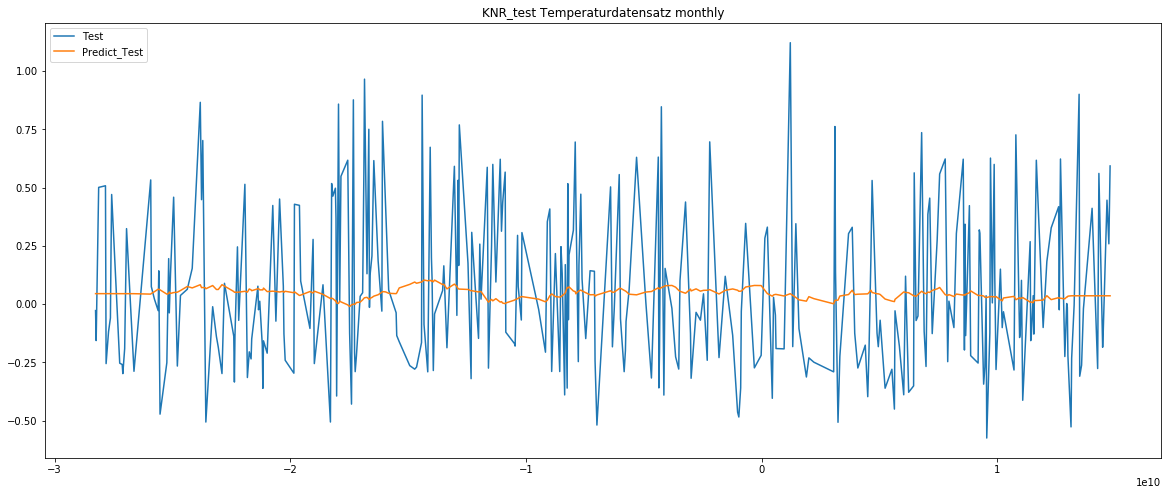

In [136]:
# Predicten der Temperatur basierend auf den Zeitwerten mit den Trainigsdaten
pd_test = pd.DataFrame(x_test_sort)
pd_test["KNR_test"] = knr_train.predict(x_test_sort)
pd_test

plt.figure(figsize =(20,8))
plt.plot(x_test_sort, y_test, label = "Test")
plt.plot(x_test_sort, pd_test["KNR_test"], label = "Predict_Test")
plt.legend(loc="upper left")
plt.title("KNR_test Temperaturdatensatz monthly")
plt.show()

In [137]:
# Berechnung der Fehler für den Trainingsdatensatz
RSE_test_knr = abs(pd_test["KNR_test"] - y_test)
RSE_test_knr
RSS_test_knr = mean_squared_error(y_test, pd_test["KNR_test"], sample_weight=None, multioutput="uniform_average")
RSS_test_knr
r2_test_knr = r2_score(y_test, pd_test["KNR_test"])
r2_test_knr

-0.010734986952794179

In [138]:
# Darstellung der Fehler für den Testdatensatz in einem DataFrame
errors_knr_test = pd.DataFrame()

In [143]:
errors_knr_test["RSS_test_knr"] = RSS_test_knr
errors_knr_test["r2_test_knr"] = r2_test_knr
errors_knr_test.head()

,RSS_test_knr,r2_test_knr
0,0.12018,-0.010735
1,0.12018,-0.010735
2,0.12018,-0.010735
3,0.12018,-0.010735
4,0.12018,-0.010735
